In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Load Data

In [5]:
!unzip /content/quora-question-pairs.zip 

Archive:  /content/quora-question-pairs.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [6]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [7]:
!unzip /content/test.csv.zip

Archive:  /content/test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: testzip.csv
  inflating: testzip.csv             


# Training Dataset

In [8]:
X_train = pd.read_csv('/content/train.csv')

In [11]:
# view some sample training data
# id: question pair ID
# qid1 & qid2: question ID
# question1 & question2: question content
# is_duplicate: the degree that q1 and q2 are duplicate

X_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [12]:
# training dataset's size
print(len(X_train))

404290


In [23]:
qids = pd.Series(X_train['qid1'].tolist() + X_train['qid2'].tolist())

In [24]:
# total number of questions
print(len(np.unique(qids)))

537933


In [25]:
# total duplicated question pairs
print(sum(X_train['is_duplicate']))

149263


In [27]:
# number of qurstions that occurs multiple times
print(sum(qids.value_counts() > 1))

111780


Text(0, 0.5, 'Number of questions')

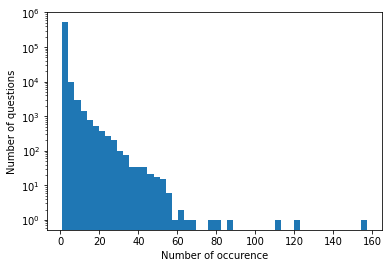

In [30]:
# total occurance for each question
plt.figure()
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.xlabel('Number of occurence')
plt.ylabel('Number of questions')

Here we see that, in our training dataset, around 37% of question paris are duplicate, 25% of questions occured multiple times, and most of them occured only less than 60 times.

# Testing Dataset

In [9]:
X_test = pd.read_csv('/content/testzip.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
X_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [32]:
print(len(X_test))

3563475


# Question analysis

In [10]:
# view question's length

train_questions = pd.Series(X_train['question1'].tolist() + X_train['question2'].tolist()).astype(str)
test_questions = pd.Series(X_test['question1'].tolist() + X_test['question2'].tolist()).astype(str)

dist_train = train_questions.apply(len)
dist_test = test_questions.apply(len)

Text(0.5, 0, 'Number of words')

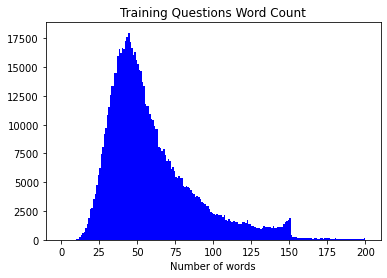

In [42]:
# training data
plt.figure()
plt.hist(dist_train, bins=200, range=[0, 200], color="blue", label='training data')
plt.title('Training Questions Word Count')
plt.xlabel('Number of words')

Text(0.5, 0, 'Number of words')

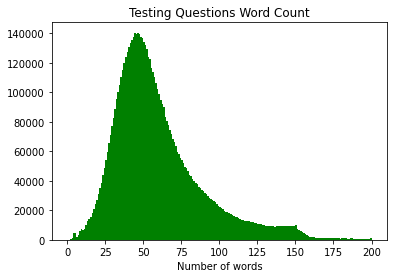

In [44]:
# testing data
plt.figure()
plt.hist(dist_test, bins=200, range=[0, 200], color="green", label='testing data')
plt.title('Testing Questions Word Count')
plt.xlabel('Number of words')

Here we see that, questions in both testing and training dataset have nearly the same sentence length, with the most ranging from 25 ~ 100.

# Word Cloud

In [11]:
from wordcloud import WordCloud

In [12]:
train_cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_questions.astype(str)))

(-0.5, 1439.5, 1079.5, -0.5)

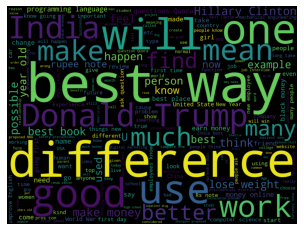

In [13]:
# now let's see what are the most comman words in our training set :)
plt.figure()
plt.imshow(train_cloud)
plt.axis('off')

In [ ]:
test_cloud = WordCloud(width=1440, height=1080).generate(" ".join(test_questions.astype(str)))

In [ ]:
# ...and now to testing data!
plt.figure()
plt.imshow(test_cloud)
plt.axis('off')